# New Section

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Classification Report:
                    precision    recall  f1-score   support

       Competition       0.00      0.00      0.00         4
         Objection       0.00      0.00      0.00        10
          Positive       0.50      0.21      0.30        14
Pricing Discussion       1.00      0.10      0.18        10
          Security       0.07      0.25      0.11         4

         micro avg       0.17      0.12      0.14        42
         macro avg       0.31      0.11      0.12        42
      weighted avg       0.41      0.12      0.15        42
       samples avg       0.17      0.12      0.12        42

Hamming Loss: 0.61
Jaccard Similarity Score (Macro): 0.06705882352941177
Confusion Matrix for Competition:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


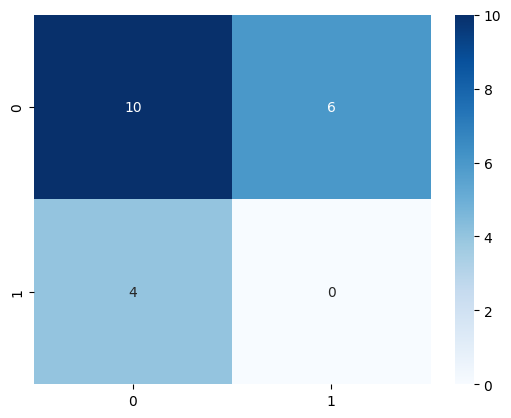

Confusion Matrix for Objection:


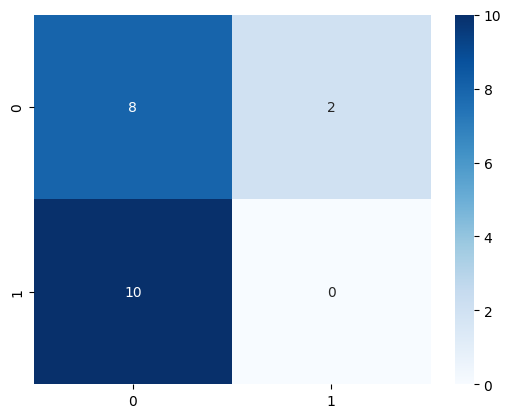

Confusion Matrix for Positive:


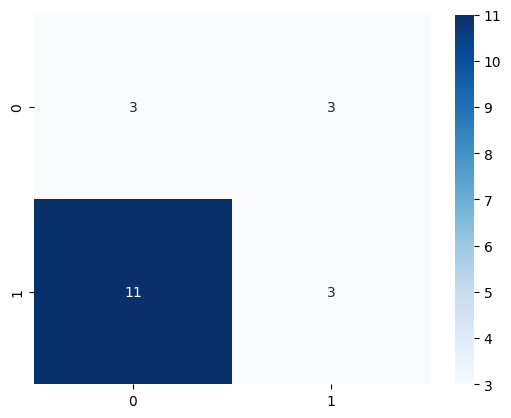

Confusion Matrix for Pricing Discussion:


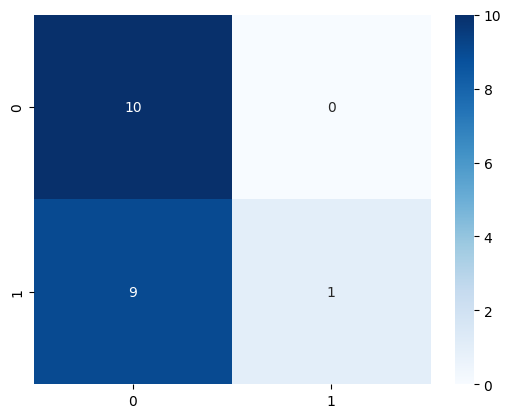

Confusion Matrix for Security:


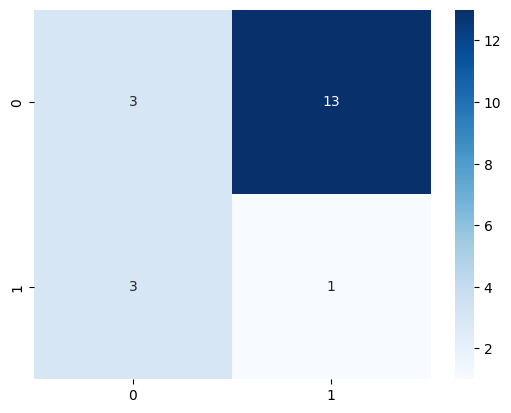

Classification Report:
                    precision    recall  f1-score   support

       Competition       0.14      0.25      0.18         4
         Objection       0.00      0.00      0.00        10
          Positive       0.50      0.07      0.12        14
Pricing Discussion       0.50      0.70      0.58        10
          Security       0.08      0.25      0.12         4

         micro avg       0.27      0.24      0.25        42
         macro avg       0.25      0.25      0.20        42
      weighted avg       0.31      0.24      0.21        42
       samples avg       0.28      0.22      0.23        42

Hamming Loss: 0.59
Jaccard Similarity Score (Macro): 0.12901960784313724
Confusion Matrix for Competition:


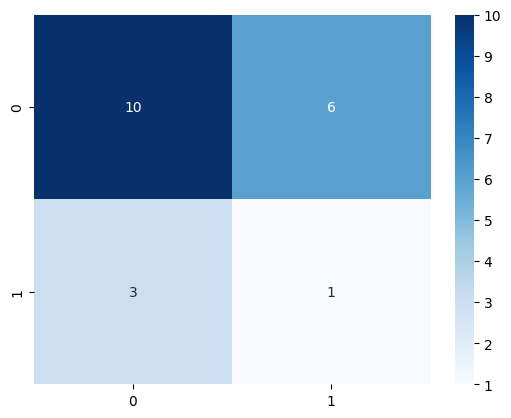

Confusion Matrix for Objection:


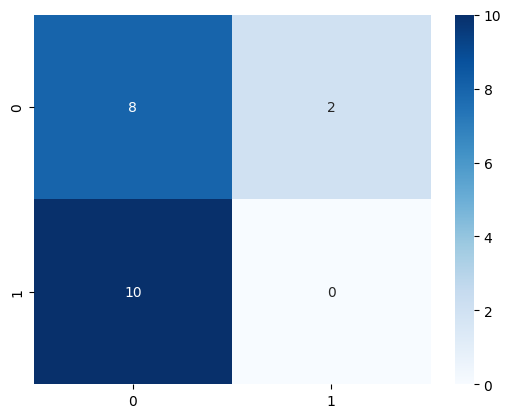

Confusion Matrix for Positive:


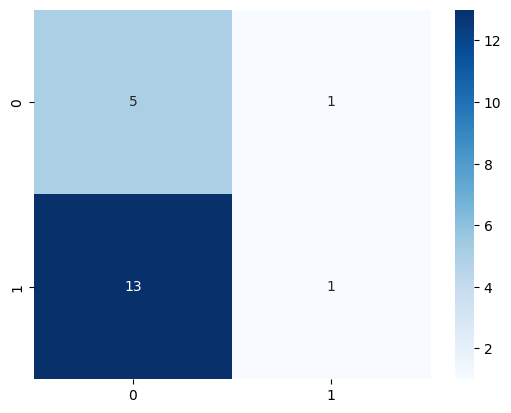

Confusion Matrix for Pricing Discussion:


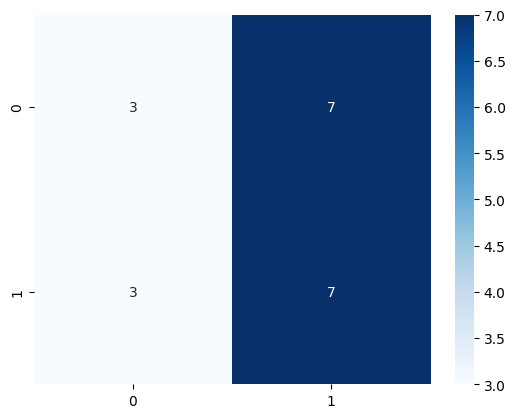

Confusion Matrix for Security:


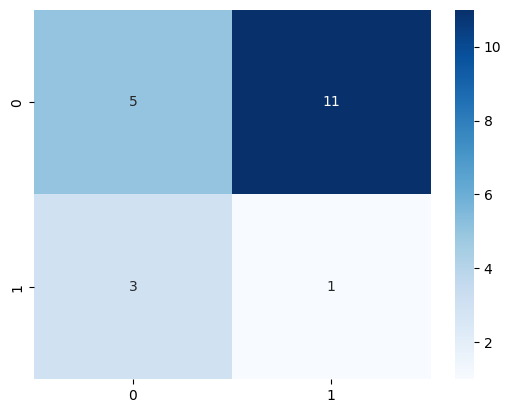

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Cross-Validation F1 Scores: [0.3018315018315018, 0.2573426573426573, 0.27487179487179486, 0.28058823529411764, 0.3801508295625943]
Mean F1 Score: 0.2989570037805332


In [1]:
##Task 1: Data Preparation & Multi-Label Text Classification

!pip install scikit-learn imbalanced-learn nltk seaborn matplotlib
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, multilabel_confusion_matrix, hamming_loss, jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
import numpy as np

# Step 1: Load the Dataset
def load_data():
    # Load calls_dataset.csv
    df = pd.read_csv("/content/drive/MyDrive/gtm_buddyy/calls_dataset.csv")
    return df

# Step 2: Clean & Preprocess Text
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Step 3: Split Data into Training and Test Sets
def split_data(df):
    # Encode labels
    df["labels"] = df["labels"].apply(lambda x: x.split(", "))
    mlb = MultiLabelBinarizer()
    labels_encoded = mlb.fit_transform(df["labels"])
    labels_df = pd.DataFrame(labels_encoded, columns=mlb.classes_)

    # Split data
    X = df["text_snippet"]
    y = labels_df
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, mlb

# Step 4: Train Multi-Label Classifier with Hyperparameter Tuning
def train_model(X_train, y_train):
    tfidf = TfidfVectorizer(max_features=5000)
    model = Pipeline([
        ("tfidf", tfidf),
        ("clf", OneVsRestClassifier(LogisticRegression()))
    ])

    # Hyperparameter tuning
    param_grid = {
        "clf__estimator__C": [0.1, 1, 10],
        "clf__estimator__penalty": ["l1", "l2"],
        "clf__estimator__solver": ["liblinear"]
    }
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring="f1_macro", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Step 5: Evaluate Model
def evaluate_model(model, X_test, y_test, mlb):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=mlb.classes_))

    # Hamming Loss
    print("Hamming Loss:", hamming_loss(y_test, y_pred))

    # Jaccard Similarity Score
    print("Jaccard Similarity Score (Macro):", jaccard_score(y_test, y_pred, average="macro"))

    # Confusion Matrix Heatmap
    cm = multilabel_confusion_matrix(y_test, y_pred)
    for i, label in enumerate(mlb.classes_):
        print(f"Confusion Matrix for {label}:")
        sns.heatmap(cm[i], annot=True, fmt="d", cmap="Blues")
        plt.show()

# Step 6: Bonus - Data Augmentation for Minority Labels (Random Oversampling)
def augment_data(X_train, y_train):
    # Combine X_train and y_train into a single DataFrame
    train_data = pd.concat([X_train, y_train], axis=1)

    # Identify minority labels (labels with fewer samples)
    label_counts = y_train.sum(axis=0)
    minority_labels = label_counts[label_counts < label_counts.median()].index

    # Oversample minority labels
    augmented_data = []
    for label in minority_labels:
        # Filter samples with the minority label
        minority_samples = train_data[train_data[label] == 1]

        # Oversample minority samples
        oversampled_samples = resample(minority_samples, replace=True, n_samples=len(minority_samples) * 2, random_state=42)
        augmented_data.append(oversampled_samples)

    # Combine original data with augmented data
    augmented_data = pd.concat([train_data] + augmented_data, axis=0)

    # Shuffle the augmented data
    augmented_data = augmented_data.sample(frac=1, random_state=42).reset_index(drop=True)

    # Split back into X_train and y_train
    X_train_resampled = augmented_data["text_snippet"]
    y_train_resampled = augmented_data.drop(columns=["text_snippet"])

    return X_train_resampled, y_train_resampled

# Step 7: Bonus - Cross-Validation
def cross_validate_model(model, X_train, y_train):
    cv = KFold(n_splits=5)
    scores = []
    for train_index, test_index in cv.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)
        # Calculate F1 score for each fold and append to scores list
        scores.append(classification_report(y_test_fold, y_pred_fold, target_names=mlb.classes_, output_dict=True)['macro avg']['f1-score'])
    print("Cross-Validation F1 Scores:", scores)
    print("Mean F1 Score:", np.mean(scores))

# Main Execution
if __name__ == "__main__":
    # Step 1: Load Data
    df = load_data()

    # Step 2: Preprocess Text
    df["text_snippet"] = df["text_snippet"].apply(preprocess_text)

    # Step 3: Split Data
    X_train, X_test, y_train, y_test, mlb = split_data(df)

    # Step 4: Train Model
    model = train_model(X_train, y_train)

    # Step 5: Evaluate Model
    evaluate_model(model, X_test, y_test, mlb)

    # Step 6: Bonus - Data Augmentation (Multi-Label Compatible)
    X_train_resampled, y_train_resampled = augment_data(X_train, y_train)
    model_resampled = train_model(X_train_resampled, y_train_resampled)
    evaluate_model(model_resampled, X_test, y_test, mlb)

    # Step 7: Bonus - Cross-Validation
    cross_validate_model(model, X_train, y_train)

In [2]:
import json
import re
import spacy
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

# Step 1: Load Domain Knowledge
def load_domain_knowledge():
    with open("/content/drive/MyDrive/gtm_buddyy/domain_knowledge.json", "r") as f:
        domain_knowledge = json.load(f)
    return domain_knowledge

# Step 2: Dictionary Lookup
def dictionary_lookup(text, domain_knowledge):
    extracted_entities = {
        "competitors": [],
        "features": [],
        "pricing_keywords": [],
        "security_keywords": [],  # New category
        "general_keywords": []    # New category
    }

    # Search for competitors
    for competitor in domain_knowledge["competitors"]:
        if competitor.lower() in text.lower():
            extracted_entities["competitors"].append(competitor)

    # Search for product features
    for feature in domain_knowledge["features"]:
        if feature.lower() in text.lower():
            extracted_entities["features"].append(feature)

    # Search for pricing keywords
    for keyword in domain_knowledge["pricing_keywords"]:
        if keyword.lower() in text.lower():
            extracted_entities["pricing_keywords"].append(keyword)

    # Search for security keywords (new category)
    for keyword in domain_knowledge["security_keywords"]:
        if keyword.lower() in text.lower():
            extracted_entities["security_keywords"].append(keyword)

    # Search for general keywords (new category)
    for keyword in domain_knowledge["general_keywords"]:
        if keyword.lower() in text.lower():
            extracted_entities["general_keywords"].append(keyword)

    return extracted_entities

# Step 3: NER with spaCy (Option B)
def initialize_spacy_model():
    # Load pre-trained spaCy model
    nlp = spacy.load("en_core_web_sm")
    return nlp

def extract_entities_with_spacy(text, nlp, domain_knowledge):
    doc = nlp(text)
    extracted_entities = {
        "competitors": [],
        "features": [],
        "pricing_keywords": [],
        "security_keywords": [],  # New category
        "general_keywords": []    # New category
    }

    # Add custom entities to spaCy's PhraseMatcher
    matcher = PhraseMatcher(nlp.vocab)
    for label, phrases in domain_knowledge.items():
        patterns = [nlp(phrase) for phrase in phrases]
        matcher.add(label, None, *patterns)

    # Match entities in the text
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]
        label = nlp.vocab.strings[match_id]
        extracted_entities[label].append(span.text)

    return extracted_entities

# Step 4: Combine Dictionary Lookup and NER
def combine_extracted_entities(dict_entities, spacy_entities):
    combined_entities = {
        "competitors": list(set(dict_entities["competitors"] + spacy_entities["competitors"])),
        "features": list(set(dict_entities["features"] + spacy_entities["features"])),
        "pricing_keywords": list(set(dict_entities["pricing_keywords"] + spacy_entities["pricing_keywords"])),
        "security_keywords": list(set(dict_entities["security_keywords"] + spacy_entities["security_keywords"])),  # New category
        "general_keywords": list(set(dict_entities["general_keywords"] + spacy_entities["general_keywords"]))      # New category
    }
    return combined_entities

# Step 5: Output Extracted Entities
def extract_entities(text, domain_knowledge, nlp):
    # Dictionary Lookup
    dict_entities = dictionary_lookup(text, domain_knowledge)

    # NER with spaCy
    spacy_entities = extract_entities_with_spacy(text, nlp, domain_knowledge)

    # Combine results
    combined_entities = combine_extracted_entities(dict_entities, spacy_entities)

    return combined_entities

# Main Execution
if __name__ == "__main__":
    # Load domain knowledge
    domain_knowledge = load_domain_knowledge()

    # Initialize spaCy model
    nlp = initialize_spacy_model()

    # Example text snippet
    text = "We love the analytics, but CompetitorX has a cheaper subscription. Can you provide a discount? Also, we need SOC2 compliance and better customer support."

    # Extract entities
    extracted_entities = extract_entities(text, domain_knowledge, nlp)
    print("Extracted Entities:")
    print(json.dumps(extracted_entities, indent=4))

Extracted Entities:
{
    "competitors": [
        "CompetitorX"
    ],
    "features": [
        "analytics"
    ],
    "pricing_keywords": [
        "discount"
    ],
    "security_keywords": [
        "SOC2"
    ],
    "general_keywords": [
        "customer support"
    ]
}
